In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [8]:
from sklearn import linear_model
from sklearn.datasets import load_iris


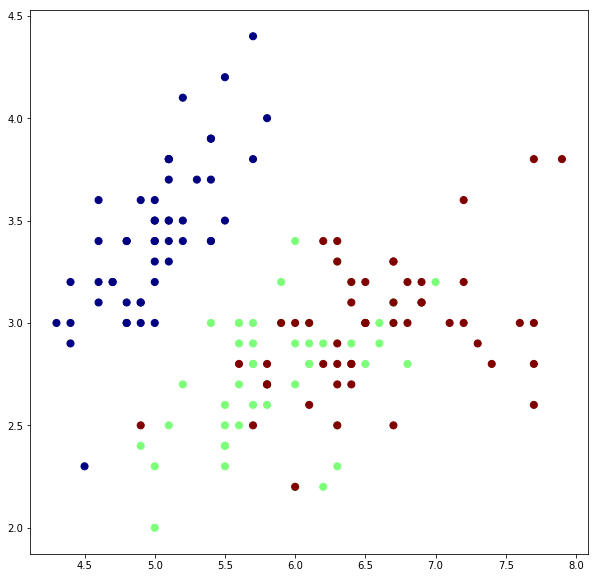

In [9]:
iris = load_iris()
X = iris.data[:,:2]
Y = iris.target
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='jet')

In [10]:
X,Y

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8, 3.4],
        [5. , 3. ],
        [5. , 3.4],
        [5.2, 3.5],
        [5.2, 3.4],
        [4.7, 3.2],
        [4.8, 3.1],
        [5.4, 3.4],
        [5.2, 4.1],
        [5.5, 4.2],
        [4.9, 3.1],
        [5. , 3.2],
        [5.5, 3.5],
        [4.9, 3.6],
        [4.4, 3. ],
        [5.1, 3.4],
        [5. , 3.5],
        [4.5, 2.3],
        [4.4, 3.2],
        [5. , 3.5],
        [5.1, 3.8],
        [4.8, 3. ],
        [5.1, 3.8],
        [4.6, 3.2],
        [5.3, 3.7],
        [5. , 3.3],


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
def visualize_tree(model,X,Y):
    h = .02  # step size in the mesh


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    plt.subplot(2, 2, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("1")

    plt.show()

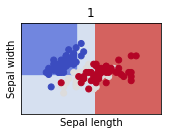

In [13]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)
# X,Y = X_train, Y_train
clf.fit(X_train,Y_train)
from sklearn import metrics
Y_pred = clf.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)

visualize_tree(clf,X,Y)

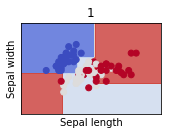

In [14]:
clf = DecisionTreeClassifier(max_depth=4,random_state=20)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)
# X,Y = X_train, Y_train
clf.fit(X_train,Y_train)
from sklearn import metrics
Y_pred = clf.predict(X_test)

visualize_tree(clf,X_train,Y_train)

In [15]:
metrics.accuracy_score(Y_test,Y_pred)

0.7166666666666667

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(100)

rfr.fit(X_train,Y_train)

Y_pred = rfr.predict(X_test)
# metrics.accuracy_score(Y_test,Y_pred)

In [17]:
Y_pred

array([0.        , 0.        , 0.        , 0.06      , 0.33      ,
       2.        , 1.01      , 0.        , 1.325     , 1.61      ,
       1.02666667, 0.        , 1.61416667, 1.035     , 1.61      ,
       0.        , 1.81      , 2.        , 1.02      , 0.        ,
       1.35      , 1.74      , 1.36      , 1.7       , 0.        ,
       2.        , 1.215     , 1.65416667, 1.66      , 1.61      ,
       1.03966667, 0.        , 1.36      , 1.17      , 0.33      ,
       0.        , 1.79      , 1.5       , 1.88      , 1.23066667,
       1.81      , 1.65416667, 0.        , 0.        , 1.18083333,
       1.92333333, 0.        , 1.345     , 1.65416667, 0.17      ,
       0.04      , 0.        , 1.65416667, 1.83      , 1.18      ,
       0.        , 1.61383333, 0.        , 1.87      , 0.9625    ])

In [18]:
Y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [21]:
errors = abs(Y_pred - Y_test)
print(errors)
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

[0.         0.         0.         0.06       0.33       0.
 0.01       0.         0.675      0.61       0.02666667 0.
 0.61416667 0.035      0.39       0.         0.81       0.
 0.98       0.         0.65       0.26       0.64       0.7
 0.         0.         0.785      0.65416667 0.66       0.61
 1.03966667 0.         0.64       0.17       0.33       0.
 0.79       1.5        0.12       0.23066667 0.19       0.65416667
 0.         0.         0.81916667 0.92333333 0.         0.345
 0.34583333 0.83       0.04       0.         0.34583333 0.83
 0.18       0.         0.38616667 0.         0.13       0.0375    ]
Average absolute error: 0.34 degrees.


In [25]:
mape = 100 * (errors / Y_test) 
print(mape)

[        nan         nan         nan         inf         inf  0.
  1.                 nan 33.75       61.          2.66666667         nan
 61.41666667  3.5        19.5                nan 81.          0.
 49.                 nan 32.5        13.         32.         70.
         nan  0.         39.25       65.41666667 66.         61.
         inf         nan 32.         17.                 inf         nan
 79.                 inf  6.         23.06666667  9.5        65.41666667
         nan         nan 40.95833333 92.33333333         nan 34.5
 17.29166667 83.                 inf         nan 17.29166667 83.
 18.                 nan 19.30833333         nan  6.5         3.75      ]


c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [31]:
mape = np.true_divide(errors , Y_test) 
mape[mape== np.inf] = 0
mape = 100* np.nan_to_num(mape)
print(mape)
accuracy = 100 - np.mean(mape)
print('Accuracy:',accuracy)

[ 0.          0.          0.          0.          0.          0.
  1.          0.         33.75       61.          2.66666667  0.
 61.41666667  3.5        19.5         0.         81.          0.
 49.          0.         32.5        13.         32.         70.
  0.          0.         39.25       65.41666667 66.         61.
  0.          0.         32.         17.          0.          0.
 79.          0.          6.         23.06666667  9.5        65.41666667
  0.          0.         40.95833333 92.33333333  0.         34.5
 17.29166667 83.          0.          0.         17.29166667 83.
 18.          0.         19.30833333  0.          6.5         3.75      ]
Accuracy: 77.66805555555555


c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
